# 04: Evaluación Visual del Modelo para Ayatsil (v2)

* **Autor:** Emmanuel Eduardo
* **Fecha de Versión:** 2025-07-21
* **Versión:** 2.0 (Avanzada)
* **Proyecto:** Pronóstico de Producción - CNH

---

## Objetivo
Este notebook carga el modelo v2 ya entrenado y los datos correspondientes para generar y guardar un conjunto de **gráficas de evaluación de forma individual**.

## Entradas
* `gold/ayatsil_features_advanced_v2.parquet`
* `ml/modelos/ayatsil_xgb_advanced_v2.json`

## Salidas
* `ml/graficas/01_eval_v2_tiempo.png`
* `ml/graficas/02_eval_v2_dispersion.png`
* `ml/graficas/03_eval_v2_errores.png`
* `ml/graficas/04_eval_v2_residuos.png`
* `ml/graficas/05_eval_v2_importancia.png`

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Configuración del Entorno y Rutas ---
ruta_base = os.path.abspath(os.path.join(os.getcwd(), "..",".."))
ruta_gold = os.path.join(ruta_base, "gold")
ruta_modelos = os.path.join(ruta_base, "ml", "modelos")
ruta_graficas = os.path.join(ruta_base, "ml", "graficas")
os.makedirs(ruta_graficas, exist_ok=True)
sns.set(style="whitegrid")

# --- 2. Cargar Artefactos del Modelo v2 ---
df_modelo = pd.read_parquet(os.path.join(ruta_gold, "ayatsil_features_advanced_v2.parquet"))
model_v2 = xgb.XGBRegressor()
model_v2.load_model(os.path.join(ruta_modelos, "ayatsil_xgb_advanced_v2.json"))
print("Modelo y datos cargados exitosamente.")

# --- 3. Preparar Datos para Evaluación ---
features = [
    'produccion_mes_anterior', 'produccion_promedio_3m', 'mes', 'trimestre',
    'produccion_lag_6', 'produccion_lag_12', 'produccion_roll_mean_6',
    'produccion_roll_std_6', 'año'
]
target = 'petroleo_mbd'
X = df_modelo[features]
y = df_modelo[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
y_pred = model_v2.predict(X_test)
residuos = y_test - y_pred
print("Predicciones y residuos calculados. Listo para generar gráficas.")

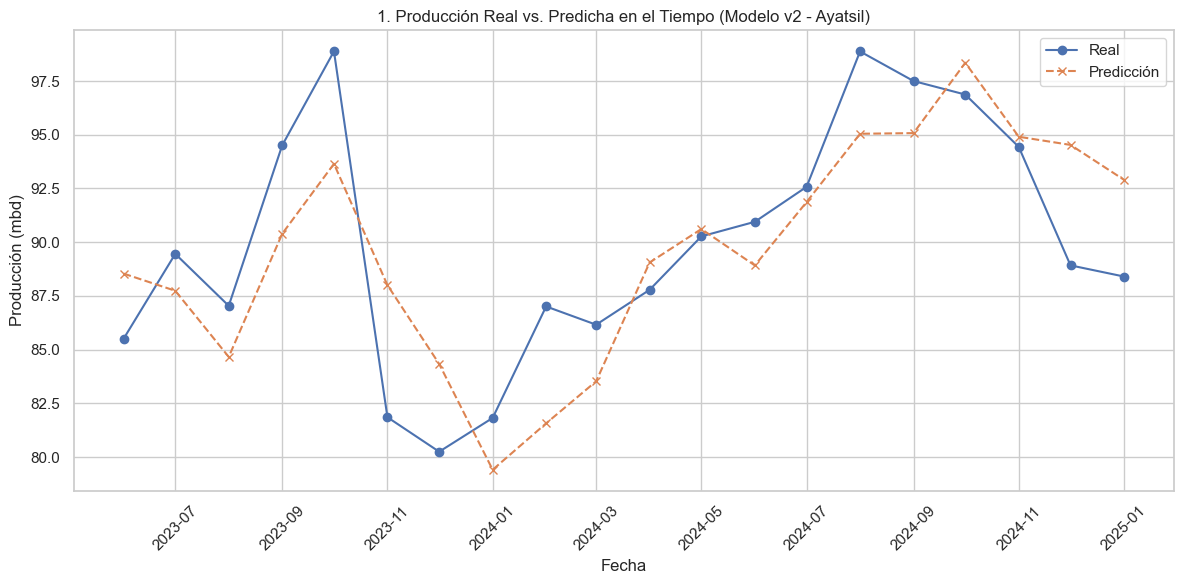

In [42]:
#Gráfico 1 - Real vs. Predicha en el Tiempo
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Real', marker='o', linestyle='-')
plt.plot(y_test.index, y_pred, label='Predicción', marker='x', linestyle='--')
plt.title('1. Producción Real vs. Predicha en el Tiempo (Modelo v2 - Ayatsil)')
plt.xlabel('Fecha')
plt.ylabel('Producción (mbd)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(ruta_graficas, "01_eval_v2_tiempo.png"), dpi=300)
plt.show()

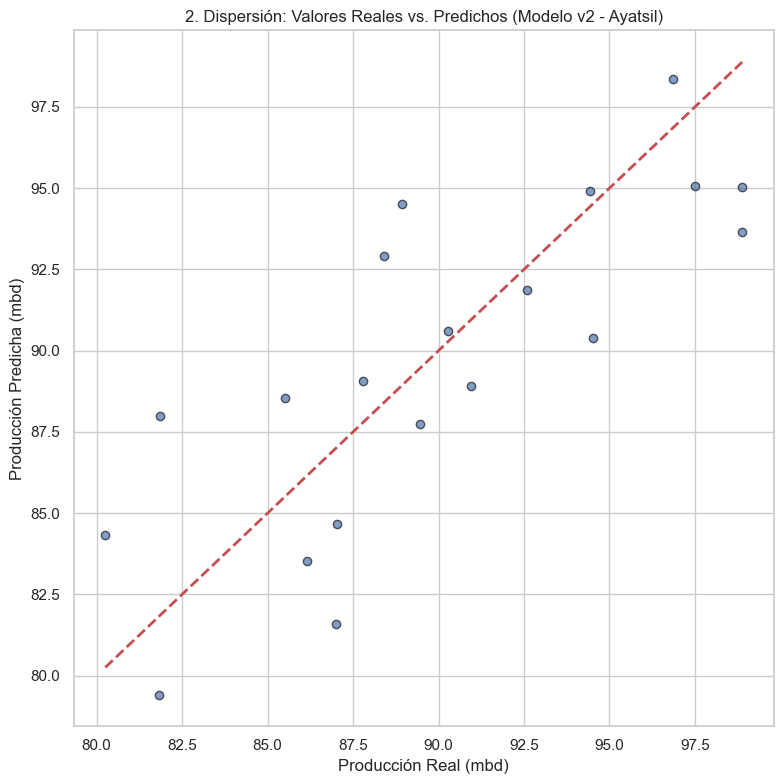

In [44]:
#Gráfico 2 - Dispersión Real vs. Predicha
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('2. Dispersión: Valores Reales vs. Predichos (Modelo v2 - Ayatsil)')
plt.xlabel('Producción Real (mbd)')
plt.ylabel('Producción Predicha (mbd)')
plt.tight_layout()
plt.savefig(os.path.join(ruta_graficas, "02_eval_v2_dispersion.png"), dpi=300)
plt.show()

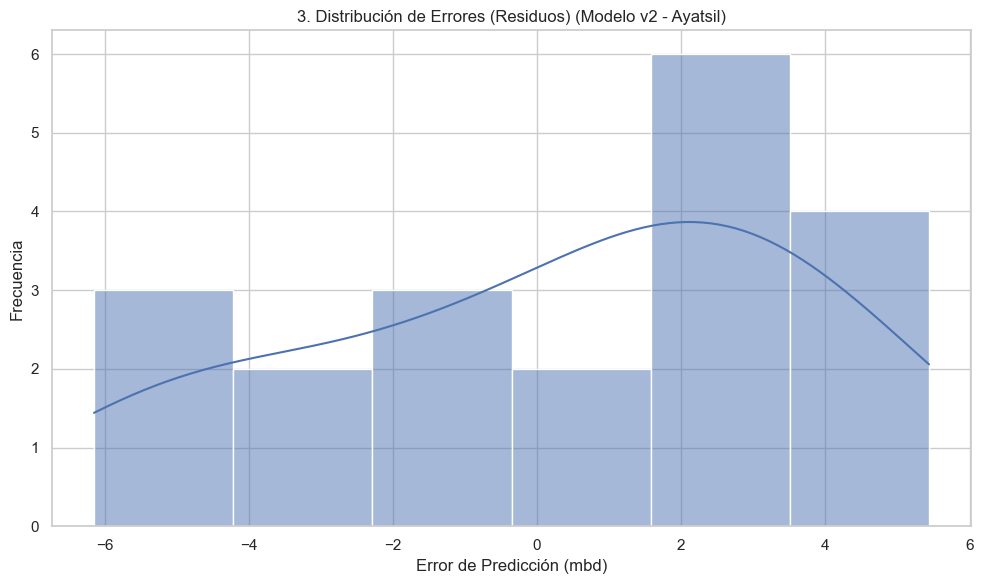

In [46]:
#Gráfico 3 - Distribución de Errores
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('3. Distribución de Errores (Residuos) (Modelo v2 - Ayatsil)')
plt.xlabel('Error de Predicción (mbd)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.savefig(os.path.join(ruta_graficas, "03_eval_v2_errores.png"), dpi=300)
plt.show()

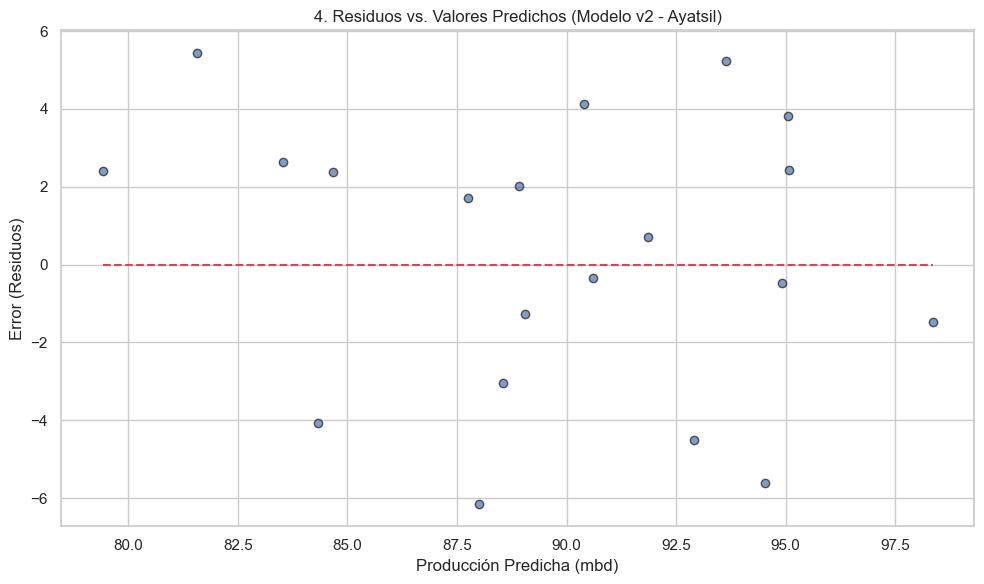

In [48]:
#Gráfico 4 - Residuos vs. Valores Predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.7, edgecolors='k')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.title('4. Residuos vs. Valores Predichos (Modelo v2 - Ayatsil)')
plt.xlabel('Producción Predicha (mbd)')
plt.ylabel('Error (Residuos)')
plt.tight_layout()
plt.savefig(os.path.join(ruta_graficas, "04_eval_v2_residuos.png"), dpi=300)
plt.show()

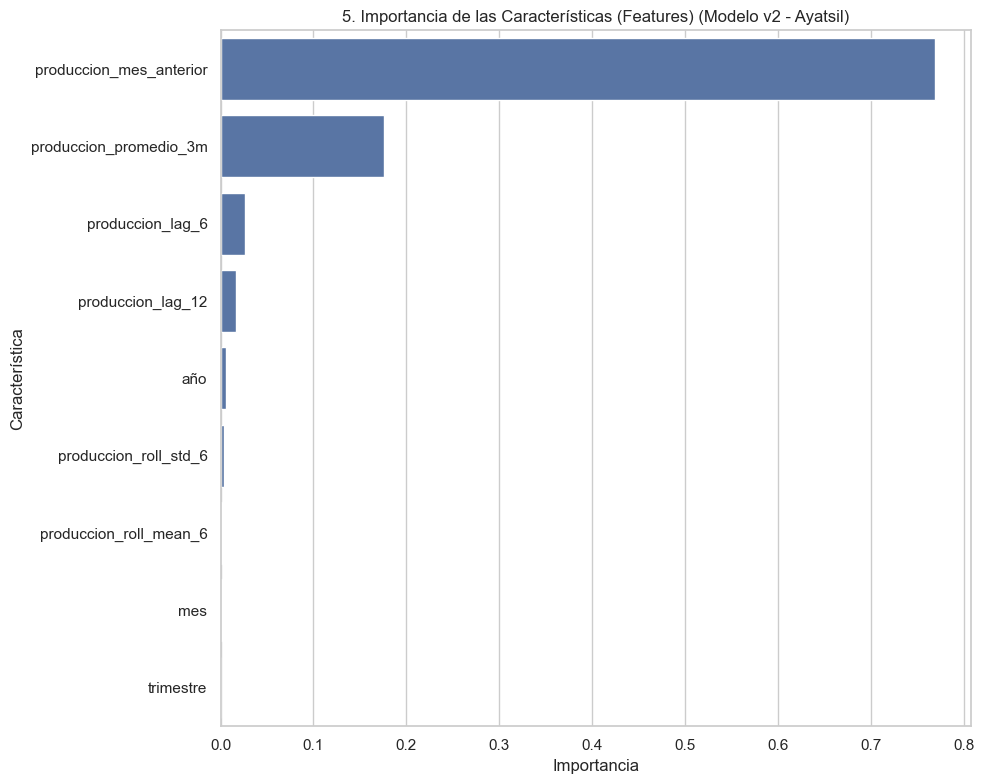

In [50]:
#Gráfico 5 - Importancia de Características
plt.figure(figsize=(10, 8))
feature_importances = pd.DataFrame({'feature': features, 'importance': model_v2.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('5. Importancia de las Características (Features) (Modelo v2 - Ayatsil)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.savefig(os.path.join(ruta_graficas, "05_eval_v2_importancia.png"), dpi=300)
plt.show()